# Importing Library

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [67]:
cols_names = ['Thermal_distress','Number_of_O_Rings','Launch_Temperature','Leak_Check_Pressure','Temporal_Order_Flight']

In [68]:
df = pd.read_fwf('/content/o-ring-erosion-or-blowby.data')

# Previewing Dataset

In [69]:
df.head()

,6,0,66,50,1
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6


In [70]:
df.shape

(22, 5)

# Data Cleaning


In [71]:
#Columns values added to row values

In [72]:
df.loc[len(df.index)] = df.columns

In [73]:
df.shape

(23, 5)

In [75]:
#Renaming columns

In [76]:
df.columns = cols_names

In [78]:
df.head()

,Thermal_distress,Number_of_O_Rings,Launch_Temperature,Leak_Check_Pressure,Temporal_Order_Flight
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6


In [80]:
#changing Dtypes

In [81]:
df.dtypes

Thermal_distress         object
Number_of_O_Rings        object
Launch_Temperature       object
Leak_Check_Pressure      object
Temporal_Order_Flight    object
dtype: object

In [82]:
df = df.astype('int64')

In [83]:
df.dtypes

Thermal_distress         int64
Number_of_O_Rings        int64
Launch_Temperature       int64
Leak_Check_Pressure      int64
Temporal_Order_Flight    int64
dtype: object

# EDA

In [90]:
df.isnull().sum()
#NO null values are present

Thermal_distress         0
Number_of_O_Rings        0
Launch_Temperature       0
Leak_Check_Pressure      0
Temporal_Order_Flight    0
dtype: int64

In [91]:
df.isna().sum()
#No Nan values are present

Thermal_distress         0
Number_of_O_Rings        0
Launch_Temperature       0
Leak_Check_Pressure      0
Temporal_Order_Flight    0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Thermal_distress       23 non-null     int64
 1   Number_of_O_Rings      23 non-null     int64
 2   Launch_Temperature     23 non-null     int64
 3   Leak_Check_Pressure    23 non-null     int64
 4   Temporal_Order_Flight  23 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [93]:
df.describe()

,Thermal_distress,Number_of_O_Rings,Launch_Temperature,Leak_Check_Pressure,Temporal_Order_Flight
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.391304,69.565217,152.173913,12.00000
std,0.0,0.656376,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,1.000000,75.000000,200.000000,17.50000
max,6.0,2.000000,81.000000,200.000000,23.00000


<Figure size 1080x720 with 0 Axes>

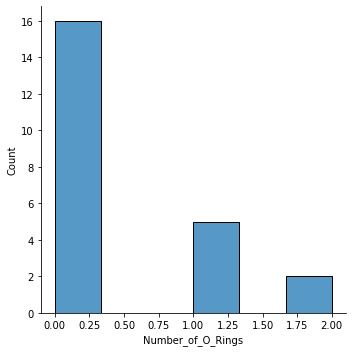

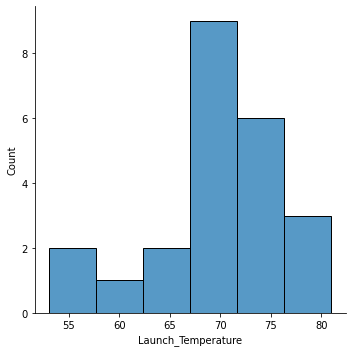

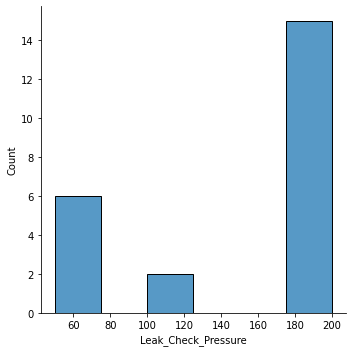

In [105]:
num_cols = ['Number_of_O_Rings','Launch_Temperature','Leak_Check_Pressure']
plt.figure(figsize=(15,10))

for i,col in enumerate(num_cols):
    #plt.subplot(2,1,i)
    sns.displot(df[col])

In [106]:
#only Temperature is normally distributed

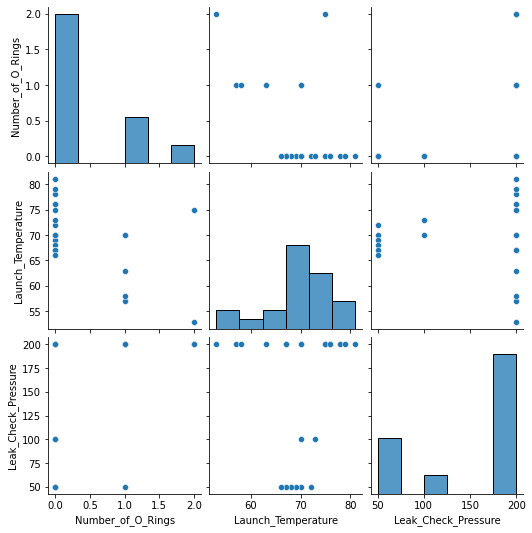

In [108]:
#pair plot
sns.pairplot(df[num_cols])

In [109]:
#only Temperature and Number_of_Rings failure has logistic realtion

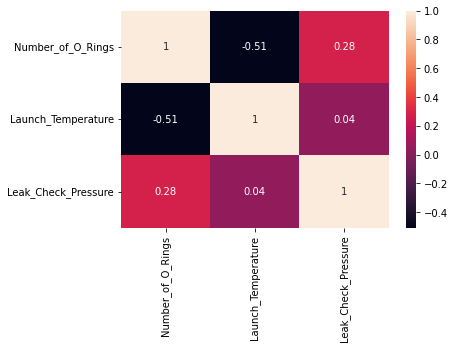

In [111]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [112]:
#here correlation exist between check pressure and Number 0f Rings

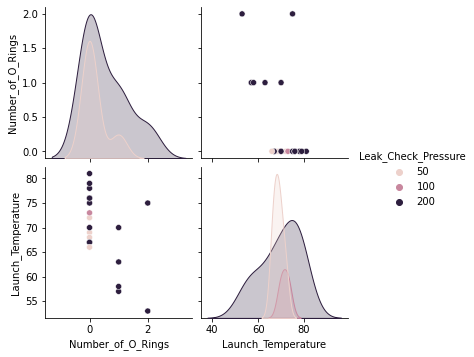

In [114]:
sns.pairplot(df[num_cols],hue='Leak_Check_Pressure')

In [115]:
# from graph its understood that pressure between 50 and 100 and above 65 temperature has no O-Rings Failure

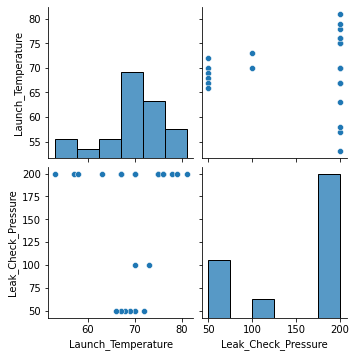

In [116]:
sns.pairplot(df[['Launch_Temperature','Leak_Check_Pressure']])

In [ ]:
#There is no linear relationship between Launch_Temperature and Leak_Check_Pressure

# Prepare data

In [123]:
X = df[['Launch_Temperature', 'Leak_Check_Pressure']]
y = df['Number_of_O_Rings']
print(X.head())
print('___________________')
print('___________________')
print(y.head())

   Launch_Temperature  Leak_Check_Pressure
0                  70                   50
1                  69                   50
2                  68                   50
3                  67                   50
4                  72                   50
___________________
___________________
0    1
1    0
2    0
3    0
4    0
Name: Number_of_O_Rings, dtype: int64


In [263]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(20, 2)
(3, 2)
(20,)
(3,)


# Modeling Data

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [283]:
model = LogisticRegression()

In [301]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model,X,y,cv=2)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0])

In [302]:
y

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    0
11    0
12    2
13    0
14    0
15    0
16    0
17    0
18    0
19    2
20    0
21    1
22    0
Name: Number_of_O_Rings, dtype: int64

In [309]:
r2_score= metrics.r2_score(y,y_pred)
mean_score= metrics.mean_squared_error(y,y_pred)
abs_score= metrics.mean_absolute_error(y,y_pred)
accuracy_score= metrics.accuracy_score(y,y_pred)
print(r2_score)
print(mean_score)
print(abs_score)
print(accuracy_score)

0.2614678899082571
0.30434782608695654
0.21739130434782608
0.8260869565217391


In [306]:
pred_score = cross_val_score(model,X,y,cv=2)
print(pred_score)


[0.83333333 0.81818182]


In [307]:
print(pred_score.mean())

0.8257575757575758


In [ ]:
#Got the accuracy score of 82%